## CS 4630 Learning Activity 

### Q3. Breast Cancer Wisconsin Diagnostic Dataset

#### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

path = r"C:\Users\ameli\OneDrive - Bowling Green State University\CLASSES\Python for Computational and Data Sciences"
os.chdir(path=path)

#### Read in Dataset

In [ ]:
df = pd.read_csv("wdbc.data", header=None, names=["id_number", "diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points", "mean_symmetry", "mean_fractal_dimension", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "worst_radius", "worst_texture", "worst_perimeter", "worst_area", "worst_smoothness", "worst_compactness", "worst_concavity", "worst_concave_points", "worst_symmetry", "worst_fractal_dimension"])
df.head(4)

Select 6 Features:

I picked  six of the mean features since they are more interpretable. The 6 selected column names are put in a list 'selected_6_features' for easy accesibility. 

In [69]:
selected_6_features = ["mean_radius", "mean_symmetry", "mean_area", "mean_concavity", "mean_texture", "mean_smoothness"]

### Describe

In [70]:
df[selected_6_features].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean_symmetry,569.0,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean_area,569.0,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean_concavity,569.0,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean_texture,569.0,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean_smoothness,569.0,0.096,0.014,0.053,0.086,0.096,0.105,0.163


- Using the describe() function helps see the overview of the distributions of features and variation between features.

- The 6 selected features contain very different ranges. For example, `mean_area` ranges from 143.5-2501 and contain much higher values than the other features. `mean_concavity`'s ranges from 0-0.427 and has smaller variation since the standard deviation is 0.08.



---

## KDE

A KDE plot is a kernel density estimate which visualizes the probability density (the likelihood of a continuous variable taking on a particular value within a given range. These plots visually represent the distribution of data, providing insights into its shape, central tendency, and spread.

Note: I left bandwidth to the default value of 1 to get a smoother curve.

### Mean Radius

Text(0, 0.5, 'Probability Density')

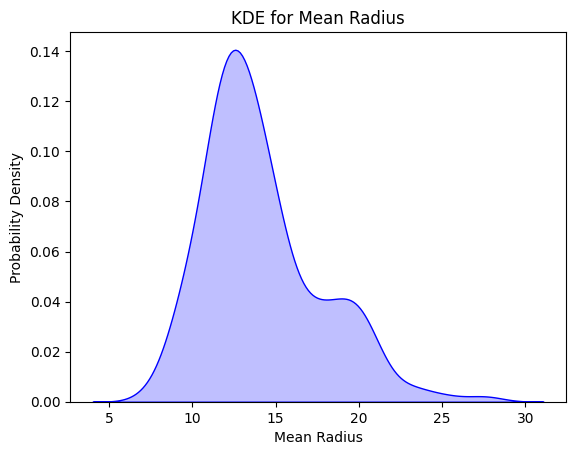

In [ ]:
sns.kdeplot(df["mean_radius"], fill=True, color='blue')

plt.title('KDE for Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel("Probability Density")

The KDE plot for `mean_radius` shows a bimodal distribution. This means that the data most likely falls into two groups. This could potenitally be from the two different diagnosis classes.

### Mean Symmetry

Text(0, 0.5, 'Probability Density')

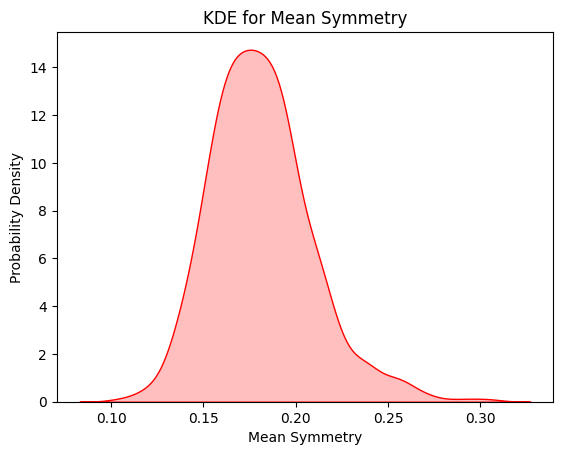

In [72]:
sns.kdeplot(df["mean_symmetry"], fill=True, color='red')

plt.title('KDE for Mean Symmetry')
plt.xlabel('Mean Symmetry')
plt.ylabel("Probability Density")

For Mean Symmetry, the KDE plot is almost a perfect bell curve, with the majority falling near the average and fewer appearing near the ends.

### Mean Area

Text(0, 0.5, 'Probability Density')

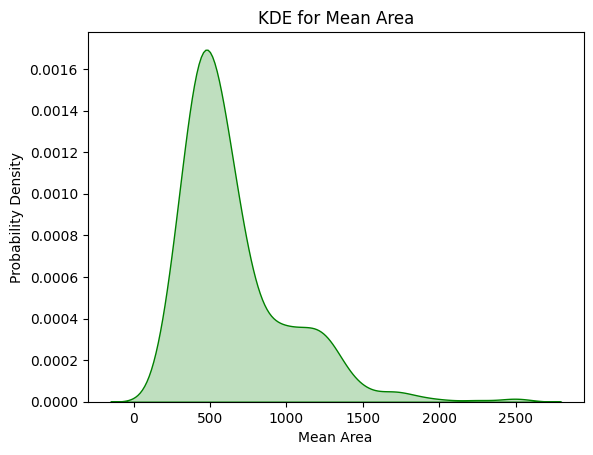

In [73]:
sns.kdeplot(df["mean_area"], fill=True, color='green')

plt.title('KDE for Mean Area')
plt.xlabel('Mean Area')
plt.ylabel("Probability Density")

The KDE for Mean Area shows a bimodal distribution, meaning that the data likely falls into two different groups.

### Mean Concavity

Text(0, 0.5, 'Probability Density')

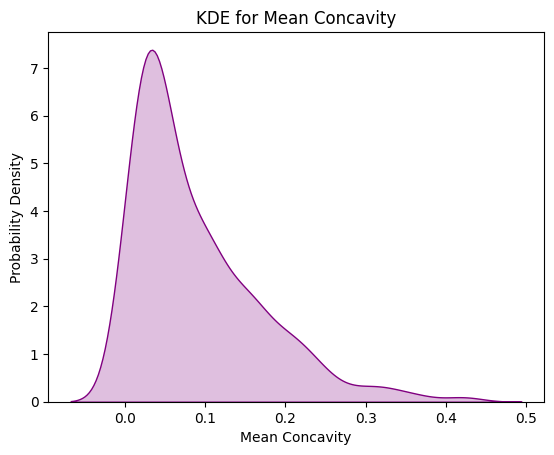

In [74]:
sns.kdeplot(df["mean_concavity"], fill=True, color='purple')

plt.title('KDE for Mean Concavity')
plt.xlabel('Mean Concavity')
plt.ylabel("Probability Density")

The KDE plot for Mean Concavity is skewed right, meaning that the mean is higher than the median and there are outliers that have a higher mean concavity.

### Mean Smoothness

Text(0, 0.5, 'Probability Density')

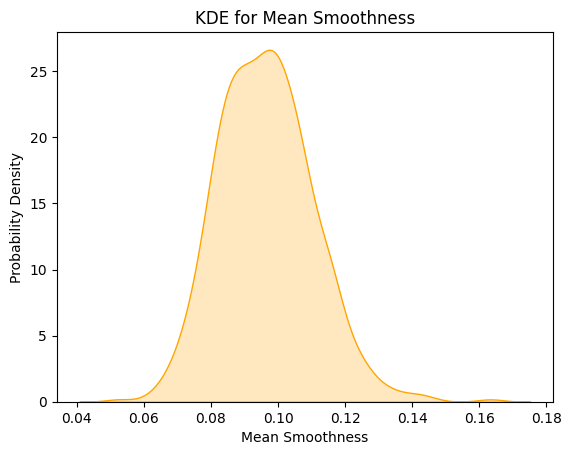

In [75]:
sns.kdeplot(df["mean_smoothness"], fill=True, color='orange')

plt.title('KDE for Mean Smoothness')
plt.xlabel('Mean Smoothness')
plt.ylabel("Probability Density")

The KDE plot for Mean Smoothness is a bell curve, but has two close peaks at the top. This could indicate that the mean smoothness clusters around 2 values instead of 1 value.

### Mean Texture

Text(0, 0.5, 'Probability Density')

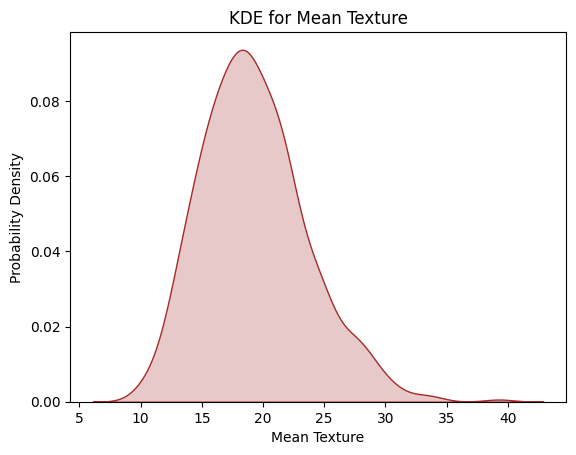

In [76]:
sns.kdeplot(df["mean_texture"], fill=True, color='brown')

plt.title('KDE for Mean Texture')
plt.xlabel('Mean Texture')
plt.ylabel("Probability Density")

The KDE plot for mean texture is a bell curve that is skewed slightly right. 

Overall, after looking at the KDE plots, it is important to know the distribution when moving onto statistical and machine learning models to make sure the correct model is being used. 

---

## Correlation Matrix

In [77]:
df_features = df.drop('id_number', axis=1)
df_features['diagnosis'] = df_features['diagnosis'].replace({'M':1, 'B':0})

C:\Users\ameli\AppData\Local\Temp\ipykernel_48388\2103349331.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features['diagnosis'] = df_features['diagnosis'].replace({'M':1, 'B':0})


In the above code, I changed the 'Maligant' to be 1 and 'Begin' to be 0.

In [78]:
df_features.head(2)

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [79]:
corr = df_features.corr()
print(corr)

                         diagnosis  mean_radius  mean_texture  mean_perimeter  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
mean_radius               0.730029     1.000000      0.323782        0.997855   
mean_texture              0.415185     0.323782      1.000000        0.329533   
mean_perimeter            0.742636     0.997855      0.329533        1.000000   
mean_area                 0.708984     0.987357      0.321086        0.986507   
mean_smoothness           0.358560     0.170581     -0.023389        0.207278   
mean_compactness          0.596534     0.506124      0.236702        0.556936   
mean_concavity            0.696360     0.676764      0.302418        0.716136   
mean_concave_points       0.776614     0.822529      0.293464        0.850977   
mean_symmetry             0.330499     0.147741      0.071401        0.183027   
mean_fractal_dimension   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

Visualizing the Correlation Using a Heatmap

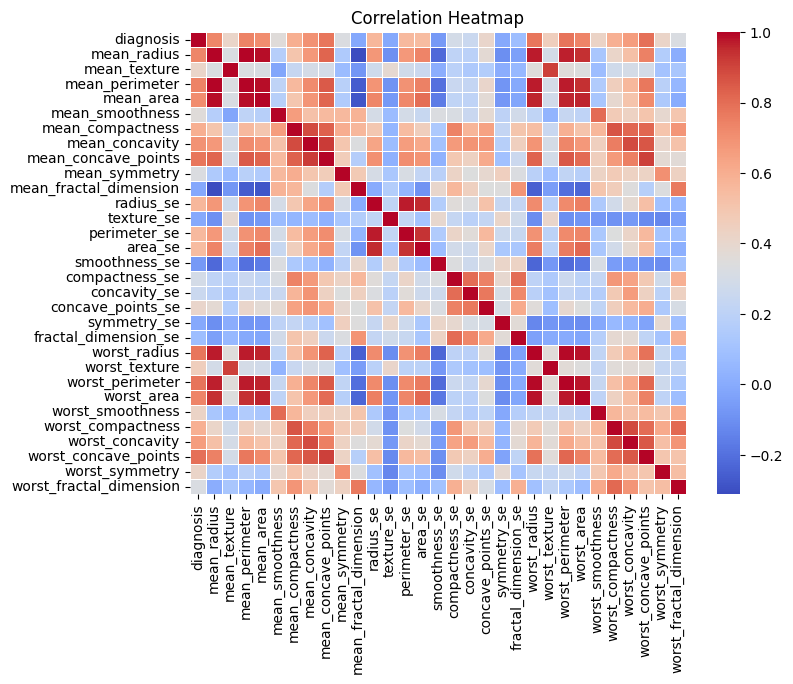

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', fmt='.2g', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Many features are strongly correlated since they are dervied from the same feature. For example, mean area and worst area contain the same value, so it makes since they are highly similar. 

Also area, perimeter, and radius are all measuring different parts of the nucleus size, they are just summarized different. This will result in these features having high correlation with one another. 

---

### Advantages, Limitations, and Future Improvements

Doing EDA is essential help see relationships and potential patterns between features without using class labels.

    - It could be beneficial to do EDA comparing the class labels to see how different features compare for different classes.

This dataset contains many features that are very similar to one another. 

    - This makes multicollinearity an issue

    - Feature selection or PCA could be used to pick the features that contribute the most to the target so dimensions are reduced and not redundant.